# Import Libraries and Configure Matplotlib
Use %matplotlib inline. Import pycircos (Garc, Gcircle), matplotlib.pyplot as plt, re for parsing mutation positions, collections for data aggregation, and matplotlib.cm + matplotlib.colors for colormap mapping.

In [1]:
# Use %matplotlib inline for inline plotting
%matplotlib inline

# Import necessary libraries
import pycircos
import matplotlib.pyplot as plt
import re
import collections
from matplotlib import cm
from matplotlib import colors

# Import specific classes from pycircos
Garc = pycircos.Garc
Gcircle = pycircos.Gcircle

# Initialize Gcircle and Single HER2 Arc (size=263) with Ticks
Create circle = Gcircle(figsize=(8,8)). Add a single Garc with arc_id='HER2', size=263, interspace=2, raxis_range=(935,985), labelposition=80, label_visible=True. circle.add_garc(arc). Call circle.set_garcs(-65,245). Add tick marks with circle.tickplot('HER2', raxis_range=(985,1000), tickinterval=20, ticklabels=None) to help navigate positions.

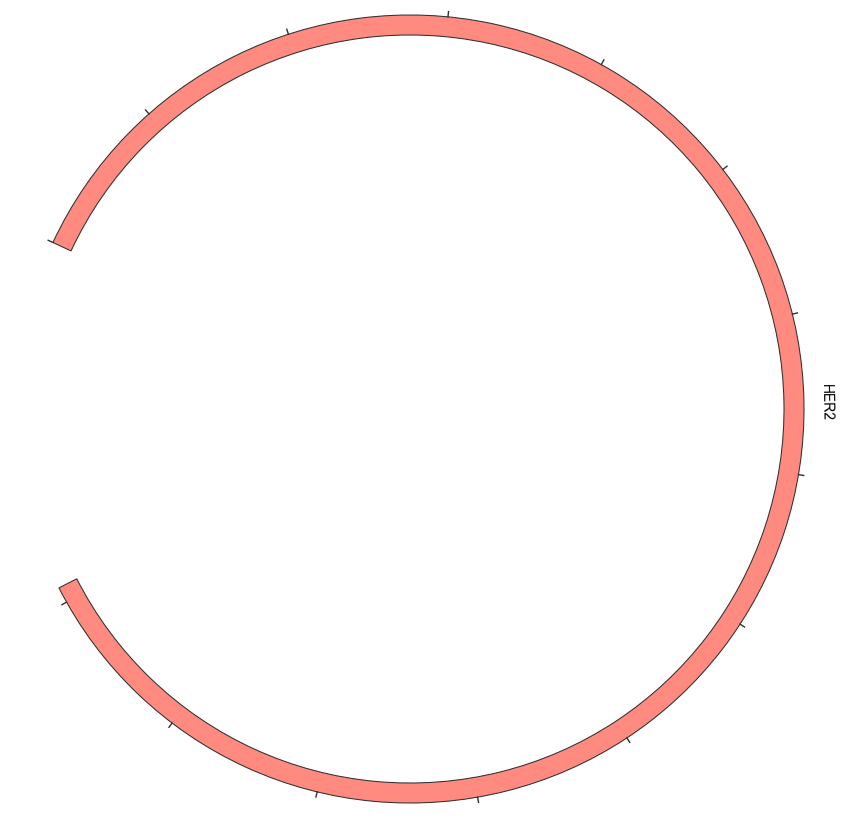

In [2]:
# Initialize Gcircle and Single HER2 Arc (size=263) with Ticks

# Create a Gcircle object with specified figure size
circle = Gcircle(figsize=(8, 8))

# Add a single Garc for HER2 with specified parameters
arc = Garc(
    arc_id='HER2',
    size=263,
    interspace=2,
    raxis_range=(935, 985),
    labelposition=80,
    label_visible=True
)
circle.add_garc(arc)

# Set the arcs with specified start and end angles
circle.set_garcs(-65, 245)

# Add tick marks to the HER2 arc for navigation
circle.tickplot(
    'HER2',
    raxis_range=(985, 1000),
    tickinterval=20,
    ticklabels=None
)

# Load and Parse kn.her2.all (two mutations per row, ddE in second column)
Open the data file (e.g., 'data/kn.her2.all'). For each non-empty line, split into columns (handle comma, tab, or space). The first column contains two mutations; extract two integer residue positions using regex (e.g., digits in tokens like L755S or 755). Convert to 1-based integers p1, p2 (clip to [1,263]). Parse ddE = float(second column). Accumulate: pairs.append((p1,p2,ddE)) and values_all for min/max.

In [4]:
# Load and Parse kn.her2.all (two mutations per row, ddE in second column)

# Initialize a list to store mutation pairs and their ddE values
pairs = []
values_all = []

# Open and parse the data file
with open('kn.her2.all') as f:
    for line in f:
        line = line.strip()
        if not line:  # Skip empty lines
            continue
        
        # Split the line into columns (handle comma, tab, or space as delimiters)
        columns = re.split(r'[,\t\s]+', line)
        
        # Extract the first column (two mutations) and second column (ddE)
        mutations = columns[0]
        ddE = float(columns[1])
        
        # Use regex to extract residue positions from mutation strings
        positions = [int(pos) for pos in re.findall(r'\d+', mutations)]
        
        # Ensure exactly two positions are extracted
        if len(positions) != 2:
            continue
        
        # Convert to 1-based integers and clip to [1, 263]
        p1 = max(1, min(263, positions[0]))
        p2 = max(1, min(263, positions[1]))
        
        # Accumulate the pair and ddE value
        pairs.append((p1, p2, ddE))
        values_all.append(ddE)

# Calculate the minimum and maximum ddE values for later use
vmin, vmax = min(values_all), max(values_all)

# Build Position Track for All 263 Residues (scatter on one ring)
Prepare positions = [i-1 for i in range(1,264)] (0-based starts). Prepare data = [1]*263. Plot with circle.scatterplot('HER2', data=data, positions=positions, rlim=[0,1.1], raxis_range=(875,915), facecolor='dimgray', spine=True) so every residue is visible on a single track.

In [5]:
# Prepare positions and data for scatter plot
positions = [i - 1 for i in range(1, 264)]  # 0-based positions for all 263 residues
data = [1] * 263  # Uniform data for all residues

# Plot the scatter plot on the HER2 arc
circle.scatterplot(
    'HER2',
    data=data,
    positions=positions,
    rlim=[0, 1.1],
    raxis_range=(875, 915),
    facecolor='dimgray',
    spine=True
)

# Map ddE to Colors and Draw Link Track (chords between residue pairs)
Compute vmin, vmax = min(values_all), max(values_all). Create a Normalize(vmin, vmax) and a colormap (e.g., plt.cm.coolwarm). For each (p1,p2,ddE): build source=('HER2', p1-1, p1, 845) and destination=('HER2', p2-1, p2, 845), then circle.chord_plot(source, destination, facecolor=cmap(norm(ddE))). Optionally add a colorbar: mappable = plt.cm.ScalarMappable(norm=norm, cmap=cmap); mappable.set_array([]); plt.colorbar(mappable, fraction=0.035, pad=0.02, label='ddE').

/var/folders/17/rj19bvws2qscyfjmb7m44zmm0000gn/T/ipykernel_35240/3177592355.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mappable, fraction=0.035, pad=0.02, label='ddE')


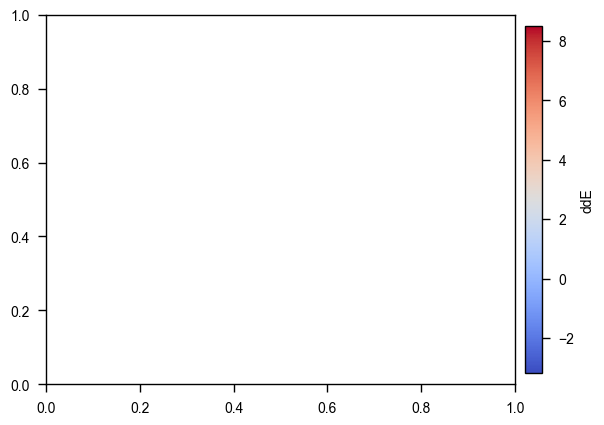

In [6]:
# Map ddE to Colors and Draw Link Track (chords between residue pairs)

# Create a normalization object and colormap for ddE values
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.coolwarm

# Iterate through each mutation pair and ddE value
for p1, p2, ddE in pairs:
    # Define the source and destination for the chord plot
    source = ('HER2', p1 - 1, p1, 845)
    destination = ('HER2', p2 - 1, p2, 845)
    
    # Plot the chord with a color mapped to the ddE value
    circle.chord_plot(source, destination, facecolor=cmap(norm(ddE)))

# Optionally add a colorbar to the plot
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
mappable.set_array([])
plt.colorbar(mappable, fraction=0.035, pad=0.02, label='ddE')

# Render and Save Figure
Display with circle.figure. Save to disk with circle.figure.savefig('her2_ddE_links.png', dpi=300, bbox_inches='tight') and optionally PDF. In VS Code, view in the Notebook output pane or open the saved file from the Explorer.

In [7]:
# Render and Save Figure
circle.figure  # Display the figure in the notebook output pane

# Save the figure as a PNG file with high resolution
circle.figure.savefig('her2_ddE_links.png', dpi=300, bbox_inches='tight')

# Optionally save the figure as a PDF file
circle.figure.savefig('her2_ddE_links.pdf', dpi=300, bbox_inches='tight')